####Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

####**About the dataset**
A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers.
The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 
1.  Basic Service 
2.  E-Service 
3.  Plus Service 
4.  Total Service

In [2]:
# load data
df = pd.read_csv('/content/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [4]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


#### Dataset EDA

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

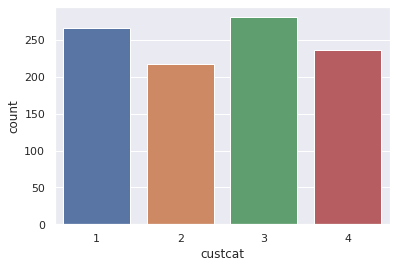

In [5]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x ='custcat')
df['custcat'].value_counts()

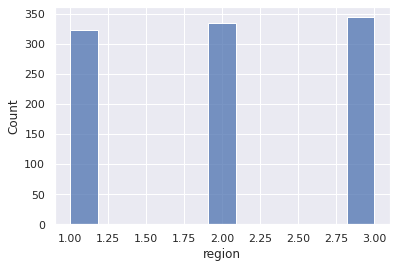

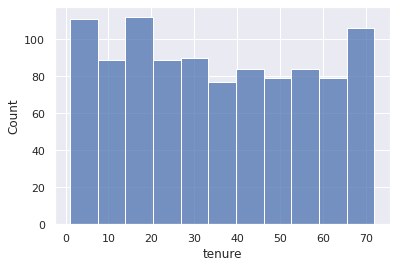

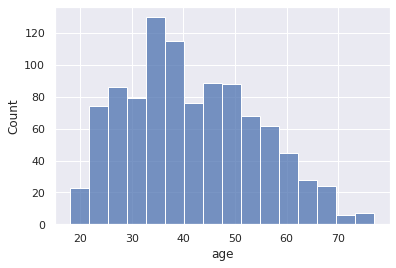

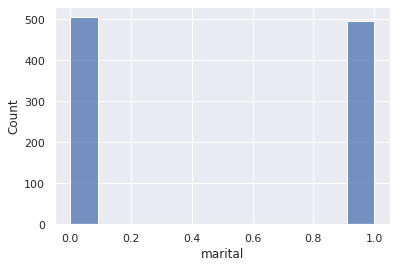

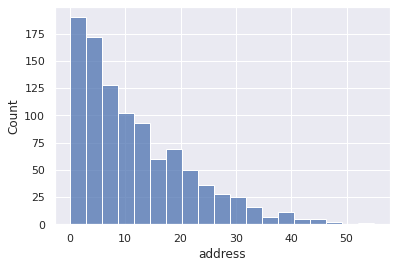

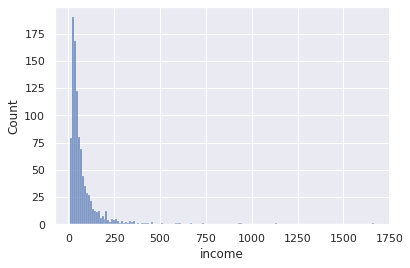

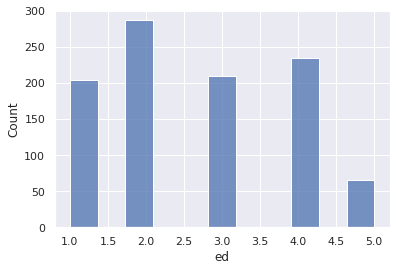

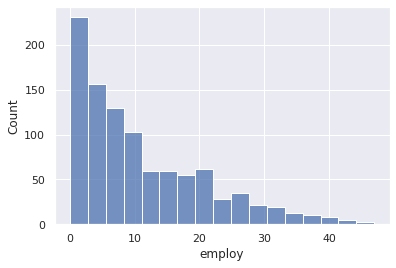

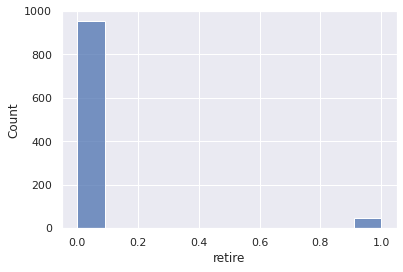

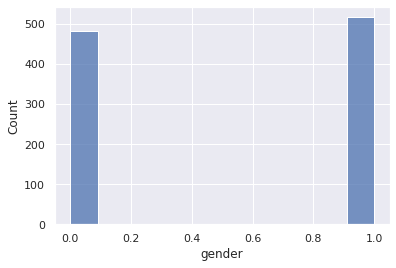

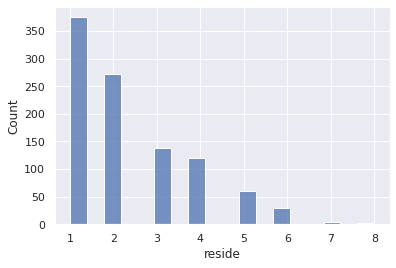

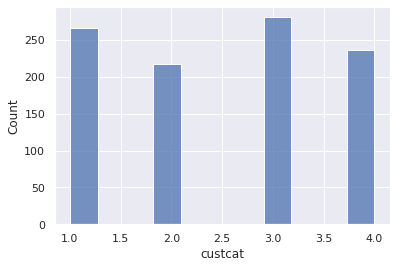

In [6]:
for i in df.columns:
  sns.histplot(data = df, x = i)
  plt.show()

####Define feature & target variables.

In [7]:
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
y = df['custcat'].values
x[:1],y[:1]

(array([[ 2., 13., 44.,  1.,  9., 64.,  4.,  5.,  0.,  0.,  2.]]), array([1]))

####Classification using KNN (K nearest neighbor)
Split data into train-test samples using KFold. Followed by Data Standardization to give data zero mean and unit variance, good practice esp for algo like KNN which is based on distance.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=7,random_state=11,shuffle=True)
kf.get_n_splits(x)
print(kf)

KFold(n_splits=7, random_state=11, shuffle=True)


In [10]:
for train_index, test_index in kf.split(x):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [11]:
scale = preprocessing.StandardScaler()
x_train = scale.fit_transform(x_train)
print(x_train[:1])
x_test = scale.transform(x_test)
print(x_test[:1])

[[-0.03158547 -1.06794793  0.19326239  1.00467292 -0.25826768 -0.12318509
   1.0921122  -0.59085873 -0.22113289 -1.06504852 -0.23560363]]
[[ 1.20024787 -1.16163428 -0.67738697  1.00467292 -0.45550281  0.54294606
   1.92134429 -0.59085873 -0.22113289 -1.06504852  2.56229136]]


In [12]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.26056338, 0.29577465, 0.34507042, 0.33802817, 0.34507042,
       0.3028169 , 0.35915493, 0.35915493, 0.31690141, 0.35211268,
       0.34507042, 0.36619718, 0.35211268, 0.38028169, 0.38028169,
       0.4084507 , 0.42253521, 0.4084507 , 0.42957746, 0.45070423,
       0.41549296, 0.4084507 , 0.42253521, 0.4084507 , 0.40140845,
       0.40140845, 0.38028169, 0.4084507 , 0.38732394])

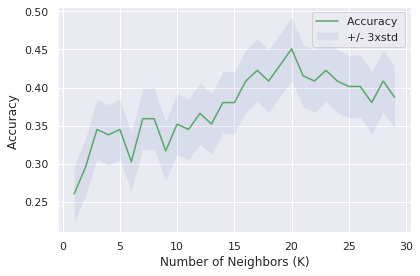

In [13]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [14]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.4507042253521127 with k= 20


In [15]:
k = 20
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat = neigh.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.4662004662004662
Test set Accuracy:  0.4507042253521127


#### Credits - IBM Cognitive Class